In [21]:
classify_prompt = """Act as an questions classifier based on the instructions you are provided. I am working on a project on benchmarking LLMs performance on various linguistic problems. 
You are a classifier who will classify and count question types based on a provided rubric, a set of questions, and their answers.

The rubric is as follows:
Questions Types:
1. Questions with 1 Answer (i.e true/false, matching, one word): Graded as 0 or 1 (must be exact)
2. Questions with Phrase Answer (i.e. questions where the answer has 3 or more words but only has one answer): Graded as 0 (completely wrong), 1 (partially right), 2 (completely right)
3. Questions with Explanation Answer (questions where an explanation and answer is requred, if the question doesn't ask for a explanation label it as phrase): Graded as 0. (completely wrong), 1 (answer is wrong but explanation right), 1 (answer is right but explanation wrong), 2 both are right

For each problem give the classification of each questions within each part. Mark each question individually, don't group them together.

Output format:

    Problem N:
        Part a: 
            m:
                Classification:  Type 1
                Solution: Answer 

Example Output:

Problem 1:
    Part a:
        15:
            Classification: Type 1
        16:
            Classification: Type 1
        ...

Problem 2:
    Part a:
        17:
            Classification: Type 2
        18:
            Classification: Type 2
        ...
Problem 4
    Part a:
        29:
            Classification: Type 2



At the end give me the count of total questions and subcounts

Total Questions: 20
    Type 1: 10
    Type 2: 8
    Type 3: 2
    
    
Don't give any other information"""

In [17]:
year = 2023
with open(f'../iol_{year}/iol_{year}_ans.txt', 'r') as f:
        real_answers = f.read()

with open(f'../iol_{year}/iol_{year}.txt', 'r') as f:
        questions = f.read()

classify_query = classify_prompt + f"\n\nQuestions:\n{questions}\n\nAnswers:\n{real_answers}"

In [19]:
grade_prompt = """Act as an expert of linguistics and reasoning. I am working on a project on benchmarking LLMs performance on various linguistic problems. 
You are grader who will help me grade the answers that the LLM provided. You will given classification for each problem (description given below), the LLM's answer, and the real answer.

The rubric is as follows:
Questions Types:
1. Questions with 1 Answer (i.e true/false, matching, one word): Graded as 0 or 1 (must be exact)
2. Questions with Phrase Answer (i.e. questions where the answer has 3 or more words but only has one answer): Graded as 0 (completely wrong), 1 (partially right), 2 (completely right)
3. Questions with Explanation Answer (questions where an explanation and answer is requred, if the question doesn't ask for a explanation label it as phrase): Graded as 0. (completely wrong), 1 (answer is wrong but explanation right), 1 (answer is right but explanation wrong), 2 both are right

Stricly follow the rubric and classifications provided, you will also be given the number of total problems. You need to grade based on the rubric and the classification provided. Grade each subquestion individually, don't group them together even if the classification is the same. 
If the LLM doesn't provide an answer or is cutoff, mark it as 0.

Output format:

    Problem N:
        Part a: 
            m:
                Classification:  Type 1 (Given)
                LLM Answer: Answer
                Real Answer: Answer
                Grade: (Based on the rubric)    

Example:

Problem 1:
    Part a:
        15:
            Classification: Type 1
            LLM Answer: netkay', ɨnnetk'a, push
            Real Answer: netkay', ɨnnetk'a, push
            Grade: 1
        16:
            Classification: Type 1
            LLM Answer: kɨrɨy', ɨnkɨr'i, pull
            Real Answer: kɨrɨy', ɨnkɨr', pull
            Grade: 0
        ...

Problem 2:
    Part a:
        17:
            Classification: Type 2
            LLM Answer: uwa xinhikaru sytu, he man brought the girl's fish.
            Real Answer: uwa xinhikaru sytu, She remembered the woman.
            Grade: 0 (not right)
        18:
            Classification: Type 2
            LLM Answer: sytu ãtary kyky
            Real Answer: hãtakuru herẽka ãtary kyky or kyky ãtary hãtakuru herẽka
            Grade: 1 (partially right)
        ...
Problem 4
    Part a:
        29:
            Classification: Type 2
            LLM Answer: kiwāpamak
            Real Answer: kiwāpamāwak
            Grade: 1 (partially right)

Don't combine the grading of the questions. Grade each question individually.

Example:

Classification Given:
Problem 5:
    Part a:
        1-8:
            Classification: Type 1

Output:
Problem 5:
    Part a:
        1:
            Classification: Type 1
            LLM Answer: ...
            Real Answer: ...
            Grade: ...
        2:
            Classification: Type 1
            LLM Answer: ...
            Real Answer: ...
            Grade: ...
        ...
        8:
            Classification: Type 1
            LLM Answer: ...
            Real Answer: ...
            Grade: ...

The output must require that each subquestion and subproblems are graded individually and not grouped together, even if no answer is provided and the classification is the same.
Even problems that are matching based should be graded individually for each matching pair.

At the end give me the total questions and LLM's performance as a total score out of possible points.

Total Score: 20/30

Don't explain your grading or provide any other summary just provide the classification and the grade based on the rubric.
Make sure to follow the rubric and the classification provided and follow the indentation and spacing, return the text in mardown."""

In [45]:
import os
import dotenv
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

from langchain_anthropic import ChatAnthropic


dotenv.load_dotenv()

model3h = ChatAnthropic(model="claude-3-5-sonnet-20240620", max_tokens = 8192, temperature=0.0)

prompt = ChatPromptTemplate.from_template("{ling}")
output_parser = StrOutputParser()

chain3h = prompt | model3h | output_parser

fix=[
 ('2015', 'claude3o'),]

for i in fix:

    # get classifications for each year
    # try:
    #     with open(f'../iol_{year}/iol_{year}_ans.txt', 'r') as f:
    #         real_answers = f.read()
        
    #     with open(f'../iol_{year}/iol_{year}.txt', 'r') as f:
    #         questions = f.read()

    #     classify_query = classify_prompt + f"\n\nQuestions:\n{questions}\n\nAnswers:\n{real_answers}"

    #     with open(f'../iol_{year}/iol_{year}_classification.txt', 'w') as f:
    #             f.write(chain3h.invoke({"ling": classify_query}))
    # except:
    #     print(f"Error processing year {year}")


    # get grades for each year
    try:
        with open(f'../iol_{i[0]}/iol_{i[0]}_classification.txt', 'r') as f:
            classification = f.read()

        with open(f'../iol_{i[0]}/iol_{i[0]}_ans.txt', 'r') as f:
            real_answers = f.read()
    
                
        # for model in ["claude3.5s","gpt4o","claude3o", "claude3h", "gemini1.5p", "gpt4", "gpt4om", "o1strawberry"]:

            try:
                with open(f'../iol_{i[0]}/{i[1]}/iol_{i[0]}_{i[1]}.txt', 'r') as f:
                        llm_sol = f.read()

                # make check_query
                grade_query = grade_prompt + "\n\nClassification:\n\n " + classification + "\n\nLLM Solutions:\n\n " + llm_sol + "\n\nReal Answers:\n\n " + real_answers
                print(grade_query)
                break
                # with open(f'../iol_{i[0]}/{i[1]}/evaluation.txt', 'w') as f:
                #     f.write(chain3h.invoke({"ling": grade_query}))

                
            except Exception as e:
                print(e)
                print(f"Error processing year {i[0]} for model {i[1]}")
            
            print(f"Done processing year {i[0]} for model {i[1]}")
    except:
         print(f"Error opening year {i[0]}")

    print(f"Done processing year {i[0]}")

Act as an expert of linguistics and reasoning. I am working on a project on benchmarking LLMs performance on various linguistic problems. 
You are grader who will help me grade the answers that the LLM provided. You will given classification for each problem (description given below), the LLM's answer, and the real answer.

The rubric is as follows:
Questions Types:
1. Questions with 1 Answer (i.e true/false, matching, one word): Graded as 0 or 1 (must be exact)
2. Questions with Phrase Answer (i.e. questions where the answer has 3 or more words but only has one answer): Graded as 0 (completely wrong), 1 (partially right), 2 (completely right)
3. Questions with Explanation Answer (questions where an explanation and answer is requred, if the question doesn't ask for a explanation label it as phrase): Graded as 0. (completely wrong), 1 (answer is wrong but explanation right), 1 (answer is right but explanation wrong), 2 both are right

Stricly follow the rubric and classifications provid

In [ ]:
import os
import dotenv
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

from langchain_anthropic import ChatAnthropic


dotenv.load_dotenv()


model3h = ChatAnthropic(model="claude-3-5-sonnet-20240620", max_tokens = 8192, temperature=0.0)

prompt = ChatPromptTemplate.from_template("{ling}")
output_parser = StrOutputParser()

chain3h = prompt | model3h | output_parser



    # get classifications for each year
    # try:
    #     with open(f'../iol_{year}/iol_{year}_ans.txt', 'r') as f:
    #         real_answers = f.read()
        
    #     with open(f'../iol_{year}/iol_{year}.txt', 'r') as f:
    #         questions = f.read()

    #     classify_query = classify_prompt + f"\n\nQuestions:\n{questions}\n\nAnswers:\n{real_answers}"

    #     with open(f'../iol_{year}/iol_{year}_classification.txt', 'w') as f:
    #             f.write(chain3h.invoke({"ling": classify_query}))
    # except:
    #     print(f"Error processing year {year}")
year = 'sample'

    # get grades for each year
try:
    with open(f'../iol_samples/text/classification.txt', 'r') as f:
        classification = f.read()

    with open(f'../iol_samples/text/sample_probs_ans.txt', 'r') as f:
        real_answers = f.read()

            
    for model in ["claude3.5s","gpt4o","claude3o", "claude3h", "gemini1.5p", "gpt4", "gpt4om", "o1strawberry"]:
    # for model in ["gpt4o"]:
        model_selection = model

        try:
            with open(f'../iol_samples/text/{model_selection}/response.txt', 'r') as f:
                    llm_sol = f.read()

            # make check_query
            grade_query = grade_prompt + "\n\nClassification:\n\n " + classification + "\n\nLLM Solutions:\n\n " + llm_sol + "\n\nReal Answers:\n\n " + real_answers
            # print(grade_query)
            # with open(f'../iol_samples/text/{model_selection}/evaluation.txt', 'w') as f:
            #     f.write(chain3h.invoke({"ling": grade_query}))
        except Exception as e:
            print(e)
            print(f"Error processing year {year} for model {model_selection}")
        
        print(f"Done processing year {year} for model {model_selection}")
except:
        print(f"Error opening year {year}")

print(f"Done processing year {year}")

Error opening year sample
Done processing year sample


In [2]:
" "*(10-1)

'         '

In [17]:
year = 2023

with open(f'../iol_{year}/iol_{year}_classification.txt', 'r') as f:
        classification = f.read()

with open(f'../iol_{year}/iol_{year}_ans.txt', 'r') as f:
        real_answers = f.read()

model_selection = 'claude3.5s'
with open(f'../iol_{year}/{model_selection}/iol_{year}_{model_selection}.txt', 'r') as f:
        llm_sol = f.read()

In [18]:
query = grade_prompt + "\n\nClassification:\n\n " + classification + "\n\nLLM Solutions:\n\n " + llm_sol + "\n\nReal Answers:\n\n " + real_answers

In [19]:
print(query)

Act as an expert of linguistics and reasoning. I am working on a project on benchmarking LLMs performance on various linguistic problems. 
You are grader who will help me grade the answers that the LLM provided. You will given classification for each problem (description given below), the LLM's answer, and the real answer.

The rubric is as follows:
Questions Types:
1. Questions with 1 Answer (i.e true/false, matching, one word): Graded as 0 or 1 (must be exact)
2. Questions with Phrase Answer (i.e. questions where the answer has 3 or more words but only has one answer): Graded as 0 (completely wrong), 1 (partially right), 2 (completely right)
3. Questions with Explanation Answer (questions where an explanation and answer is requred, if the question doesn't ask for a explanation label it as phrase): Graded as 0. (completely wrong), 1 (answer is wrong but explanation right), 1 (answer is right but explanation wrong), 2 both are right

Stricly follow the rubric and classifications provid

In [93]:
# manual grading
import yaml
import json

with open(f'../iol_2023/gpt4o/evaluation.txt', 'r') as f:
    classification = f.read()
    
parsed = yaml.load(classification, Loader=yaml.FullLoader)

In [94]:
json_text = json.dumps(parsed, indent=4)
json_obj = json.loads(json_text)

In [96]:
from difflib import SequenceMatcher
total_score = 0
total_possible = 0
for problem in json_obj:
    if problem[0:7] != "Problem":
        continue
    print(f"Problem {problem}:")

    for part in json_obj[problem]:
        print(f"    {part}:")
        part_score = 0
        part_possible = 0
        for question in json_obj[problem][part]:
            print(f"        {question}:")
            print(f"            Classification: {json_obj[problem][part][question]['Classification']}")
            print(f"            LLM Answer: {json_obj[problem][part][question]['LLM Answer']}")
            print(f"            Real Answer: {json_obj[problem][part][question]['Real Answer']}")
            print(f"            Grade: {json_obj[problem][part][question]['Grade']}")
            # grading
            if json_obj[problem][part][question]['Classification'] == "Type 1":
                if json_obj[problem][part][question]['LLM Answer'] == json_obj[problem][part][question]['Real Answer']:
                    part_score += 1
                else:
                    json_obj[problem][part][question]['Grade'] = 0
                part_possible += 1
            elif json_obj[problem][part][question]['Classification'] == "Type 2":
                part_score += 2 * SequenceMatcher(None, json_obj[problem][part][question]['LLM Answer'], json_obj[problem][part][question]['Real Answer']).ratio()
                part_possible += 2
            elif json_obj[problem][part][question]['Classification'] == "Type 3":
                part_score += int(json_obj[problem][part][question]['Grade'])
                part_possible += 2
        print(f"        Part Score: {part_score}/{part_possible}")
        total_score += part_score
        total_possible += part_possible
        
print(f"Total Score: {total_score}/{total_possible}")

Problem Problem 1:
    Part a:
        15:
            Classification: Type 1
            LLM Answer: netkay', ɨnnetk'a, push
            Real Answer: netkay', ɨnnetk'a, push
            Grade: 1
        16:
            Classification: Type 1
            LLM Answer: kɨrɨy', ɨnkɨr'i, pull
            Real Answer: kɨrɨy', ɨnkɨr'i, pull
            Grade: 1
        17:
            Classification: Type 1
            LLM Answer: p'uhruy', ɨmp'uhur'i, make holes
            Real Answer: p'uhruy', ɨmp'uhur'i, make holes
            Grade: 1
        18:
            Classification: Type 1
            LLM Answer: her'oy, ɨnher'o, smooth out
            Real Answer: her'oy, ɨnher'o, smooth out
            Grade: 1
        Part Score: 4/4
    Part b:
        39:
            Classification: Type 1
            LLM Answer: her'oŋ, I smooth out
            Real Answer: her'oŋ, I smoothed (it) out
            Grade: 0
        40:
            Classification: Type 1
            LLM Answer: ɨniʂpaʔ, I lef

Full Evaluation System. Type 1 and Type 3 Questions have already been graded, we will just grade Type 2.

In [1]:
import json
import re

def parse_grading_text_from_file(file_path):
    # Create a structure to hold the final result
    result = {}
    
    current_problem = None
    current_part = None
    current_question = None
    current_data = {}

    # Read the content from the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Process each line
    for line in lines:
        line = line.strip()  # Clean leading/trailing spaces

        # Match "Problem X:"
        problem_match = re.match(r'^Problem (\d+):', line)
        if problem_match:
            current_problem = f"Problem {problem_match.group(1)}"
            result[current_problem] = {}
            current_part = None  # Reset current part and question when a new problem starts
            current_question = None
            continue

        # Match "Part X:" where X can be a letter or a number
        part_match = re.match(r'^Part ([a-zA-Z0-9]+):', line)
        if part_match:
            current_part = f"Part {part_match.group(1)}"
            result[current_problem][current_part] = {}
            current_question = None  # Reset question for this part
            continue

        # Ensure that there is a current problem and part before proceeding
        if not current_problem or not current_part:
            continue

        # Match question number (e.g., 1, 2, 3, ...) or detect the absence of a question number
        question_match = re.match(r'^(\d+):', line)
        if question_match:
            current_question = question_match.group(1)
            current_data = {}
            result[current_problem][current_part][current_question] = current_data
            continue

        # Handle case when no question number exists (direct Classification under Part)
        if not current_question:
            current_data = result[current_problem][current_part]
        
        # Match Classification, LLM Answer, Real Answer, and Grade
        classification_match = re.match(r'^Classification:\s*(.+)', line)
        llm_answer_match = re.match(r'^LLM Answer:\s*(.+)', line)
        real_answer_match = re.match(r'^Real Answer:\s*(.+)', line)
        grade_match = re.match(r'^Grade:\s*(\d+)', line)

        if classification_match:
            current_data["Classification"] = classification_match.group(1)
        elif llm_answer_match:
            current_data["LLM Answer"] = llm_answer_match.group(1)
        elif real_answer_match:
            current_data["Real Answer"] = real_answer_match.group(1)
        elif grade_match:
            current_data["Grade"] = int(grade_match.group(1))

    return result

# Example usage:
# parsed_data = parse_grading_text_from_file('path_to_your_file.txt')
# json_output = json.dumps(parsed_data, indent=4)
# print(json_output)

In [2]:
import yaml
import json
import pandas as pd
from difflib import SequenceMatcher

# load to yaml helper func
def text_to_json(path):
    try:
        parsed_data = parse_grading_text_from_file(path)
        json_text = json.dumps(parsed_data, indent=4)
        return json.loads(json_text)
    except Exception as e:
        print(e)
        print(f"Error parsing text for path {path}")
        return None

# function to get scores and data from graded data
def grad_parser(graded_data: json):
    total_score = 0
    total_possible = 0
    total_questions = 0
    type1_right = 0
    type1_possible = 0
    type2_right = 0
    type2_possible = 0
    type3_right = 0
    type3_possible = 0
    for problem in graded_data:
        if problem[0:7] != "Problem":
            continue
        total_questions += 1
        for part in graded_data[problem]:
            part_score = 0
            part_possible = 0
            for question in graded_data[problem][part]:
                if question[0:4] == "Clas":
                    try:
                        get_grade = int(json_obj[problem][part]['Grade'][0])
                    except:
                        get_grade = json_obj[problem][part]['Grade']
                        
                    if json_obj[problem][part]['Classification'] == "Type 1":
                        part_score += get_grade
                        type1_right += get_grade
                        part_possible += 1
                        type1_possible += 1
                    elif json_obj[problem][part]['Classification'] == "Type 2":
                        overlap = 2 * SequenceMatcher(None, json_obj[problem][part]['LLM Answer'], json_obj[problem][part]['Real Answer']).ratio()
                        part_score += overlap
                        part_possible += 2
                        type2_right += overlap
                        type2_possible += 2
                    elif json_obj[problem][part]['Classification'] == "Type 3":
                        part_score += get_grade
                        part_possible += 2
                        type3_right += get_grade
                        type3_possible += 2
                    break
                # grading
                try:
                    get_grade = int(json_obj[problem][part][question]['Grade'][0])
                except:
                    get_grade = json_obj[problem][part][question]['Grade']
                    
                if json_obj[problem][part][question]['Classification'] == "Type 1":
                    part_score += get_grade
                    type1_right += get_grade
                    part_possible += 1
                    type1_possible += 1
                elif json_obj[problem][part][question]['Classification'] == "Type 2":
                    overlap = 2 * SequenceMatcher(None, json_obj[problem][part][question]['LLM Answer'], json_obj[problem][part][question]['Real Answer']).ratio()
                    part_score += overlap
                    part_possible += 2
                    type2_right += overlap
                    type2_possible += 2
                elif json_obj[problem][part][question]['Classification'] == "Type 3":

                    part_score += get_grade
                    part_possible += 2
                    type3_right += get_grade
                    type3_possible += 2
            total_score += part_score
            total_possible += part_possible
    accuracy = total_score / total_possible
    return total_score, total_possible, accuracy, total_questions, type1_right, type1_possible, type2_right, type2_possible, type3_right, type3_possible

In [3]:
years = [str(i) for i in range(2004, 2024)]
# remove 2020
years.remove('2020')

models = ["gpt4o", "claude3.5s", "claude3o", "claude3h", "gemini1.5p", "gpt4", "gpt4om", "o1strawberry"]

eval_table = pd.DataFrame(columns=["Year", "Model", "Total Score", "Total Possible", "Accuracy", "Total Questions", "Type 1 Right", "Type 1 Possible", "Type 2 Right", "Type 2 Possible", "Type 3 Right", "Type 3 Possible"])

# add blank rows to eval_table
for year in years:
    for model in models:
        year = str(year)
        path = '../iol_' + year + '/' + model + '/evaluation.txt'
        json_obj = text_to_json(path)
        if json_obj:
            print(f"Processing year {year} for model {model}")
            total_score, total_possible, accuracy, total_questions, type1_right, type1_possible, type2_right, type2_possible, type3_right, type3_possible = grad_parser(json_obj)
            print(f"Total Score: {total_score}/{total_possible}")
            print(f"Accuracy: {accuracy}")
            eval_table = pd.concat([eval_table, pd.DataFrame([[year, model, total_score, total_possible, accuracy, total_questions, type1_right, type1_possible, type2_right, type2_possible, type3_right, type3_possible]], columns=["Year", "Model", "Total Score", "Total Possible", "Accuracy", "Total Questions", "Type 1 Right", "Type 1 Possible", "Type 2 Right", "Type 2 Possible", "Type 3 Right", "Type 3 Possible"])], ignore_index=True)
        else:
            print(f"Error processing year {year} for model {model}")

Processing year 2004 for model gpt4o
Total Score: 19.981643778765395/45
Accuracy: 0.4440365284170088
Processing year 2004 for model claude3.5s
Total Score: 22.132561128511846/45
Accuracy: 0.4918346917447077
Processing year 2004 for model claude3o
Total Score: 26.83469737636775/45
Accuracy: 0.5963266083637278
Processing year 2004 for model claude3h
Total Score: 22.95142195054278/45
Accuracy: 0.5100315989009506
Processing year 2004 for model gemini1.5p
Total Score: 17.97957850958175/45
Accuracy: 0.39954618910181666
Processing year 2004 for model gpt4
Total Score: 16.061937537203576/45
Accuracy: 0.3569319452711906
Processing year 2004 for model gpt4om
Total Score: 25.544078283496457/45
Accuracy: 0.5676461840776991
Processing year 2004 for model o1strawberry
Total Score: 26.323074318070987/45
Accuracy: 0.5849572070682442
Processing year 2005 for model gpt4o
Total Score: 39.76542886603609/60
Accuracy: 0.6627571477672681
Processing year 2005 for model claude3.5s
Total Score: 34.7730411340944

/var/folders/5t/bmhkrbcn4yzgbdrrgwk7ps_r0000gn/T/ipykernel_57345/2190170196.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eval_table = pd.concat([eval_table, pd.DataFrame([[year, model, total_score, total_possible, accuracy, total_questions, type1_right, type1_possible, type2_right, type2_possible, type3_right, type3_possible]], columns=["Year", "Model", "Total Score", "Total Possible", "Accuracy", "Total Questions", "Type 1 Right", "Type 1 Possible", "Type 2 Right", "Type 2 Possible", "Type 3 Right", "Type 3 Possible"])], ignore_index=True)


Processing year 2017 for model claude3.5s
Total Score: 55.47389158968029/73
Accuracy: 0.7599163231463054
Processing year 2017 for model claude3o
Total Score: 53.19631683129058/73
Accuracy: 0.7287166689217888
Processing year 2017 for model claude3h
Total Score: 50.06636874669691/89
Accuracy: 0.5625434690640102
Processing year 2017 for model gemini1.5p
Total Score: 26.534698567613145/73
Accuracy: 0.3634890214741527
Processing year 2017 for model gpt4
Total Score: 52.19159526979499/73
Accuracy: 0.7149533598602054
Processing year 2017 for model gpt4om
Total Score: 49.89264731812753/89
Accuracy: 0.5605915429003093
Processing year 2017 for model o1strawberry
Total Score: 55.70688290355411/89
Accuracy: 0.6259200326242035
Processing year 2018 for model gpt4o
Total Score: 44.522306638621394/88
Accuracy: 0.5059353027116068
Processing year 2018 for model claude3.5s
Total Score: 42.98444216801437/88
Accuracy: 0.4884595700910724
Processing year 2018 for model claude3o
Total Score: 48.74913580897577

In [24]:
eval_table.to_excel("eval_table.xlsx")

In [27]:
# Calculate the percentage of Type 1 Right for each row
eval_table['Type 1 Percentage'] = (eval_table['Type 1 Right'] / eval_table['Type 1 Possible']) * 100

# Group by 'Model' and calculate the mean percentage of Type 1 Right for each model
type1_percentage_by_model = eval_table.groupby('Model')['Type 1 Percentage'].mean()

# Display the result
print(type1_percentage_by_model)

Model
claude3.5s      40.743087
claude3h        19.730632
claude3o        39.035472
gemini1.5p      17.587902
gpt4            24.777628
gpt4o           25.323282
gpt4om          22.601815
o1strawberry    26.572247
Name: Type 1 Percentage, dtype: object


In [29]:
# Calculate the percentage of Type 1 Right for each row
eval_table['Type 2 Percentage'] = (eval_table['Type 2 Right'] / eval_table['Type 2 Possible']) * 100

# Group by 'Model' and calculate the mean percentage of Type 1 Right for each model
type1_percentage_by_model = eval_table.groupby('Model')['Type 1 Percentage'].mean()

# Display the result
print(type1_percentage_by_model)

Model
claude3.5s      40.743087
claude3h        19.730632
claude3o        39.035472
gemini1.5p      17.587902
gpt4            24.777628
gpt4o           25.323282
gpt4om          22.601815
o1strawberry    26.572247
Name: Type 1 Percentage, dtype: object


In [28]:
# Calculate the percentage of Type 1 Right, ensuring that division by zero is avoided
eval_table['Type 3 Percentage'] = eval_table.apply(
    lambda row: (row['Type 3 Right'] / row['Type 3 Possible']) * 100 if row['Type 3 Possible'] > 0 else 0,
    axis=1
)

# Group by 'Model' and calculate the mean percentage of Type 1 Right for each model
type1_percentage_by_model = eval_table.groupby('Model')['Type 3 Percentage'].mean()

# Display the result
print(type1_percentage_by_model)

Model
claude3.5s      19.345238
claude3h        26.111111
claude3o        26.617647
gemini1.5p      31.359649
gpt4            20.098039
gpt4o           28.728070
gpt4om          22.037037
o1strawberry    24.537037
Name: Type 3 Percentage, dtype: float64


In [19]:
print(eval_table.groupby('Model')['Accuracy'].mean())

Model
claude3.5s      0.598534
claude3h        0.504528
claude3o        0.538854
gemini1.5p      0.424535
gpt4            0.514698
gpt4o           0.486229
gpt4om          0.458146
o1strawberry    0.531923
Name: Accuracy, dtype: float64


In [26]:
type1 = eval_table['Type 1 Right'] / eval_table['Type 1 Possible']
type2 = eval_table['Type 2 Right'] / eval_table['Type 2 Possible']

type3 =

print("Mean Type 1 Accuracy: ", type1.mean())
print("Mean Type 2 Accuracy: ", type2.mean())
print("Mean Type 3 Accuracy: ", type3.mean())

ZeroDivisionError: division by zero

/var/folders/5t/bmhkrbcn4yzgbdrrgwk7ps_r0000gn/T/ipykernel_32295/777869440.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(eval_table['Accuracy'], shade=True, color="b")


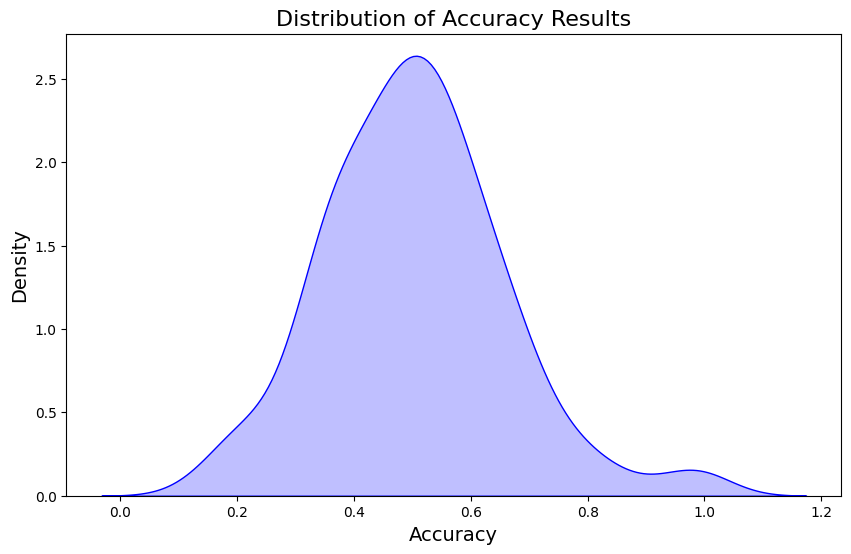

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'eval_table' is your DataFrame with an 'Accuracy' column
# You can replace 'Accuracy' with any other metric you want to plot
plt.figure(figsize=(10, 6))

# Plotting the distribution curve using seaborn
sns.kdeplot(eval_table['Accuracy'], shade=True, color="b")

# Adding title and labels
plt.title('Distribution of Accuracy Results', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

/var/folders/5t/bmhkrbcn4yzgbdrrgwk7ps_r0000gn/T/ipykernel_32295/1764766985.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=eval_table[eval_table['Model'] == model]['Accuracy'],
/var/folders/5t/bmhkrbcn4yzgbdrrgwk7ps_r0000gn/T/ipykernel_32295/1764766985.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=eval_table[eval_table['Model'] == model]['Accuracy'],
/var/folders/5t/bmhkrbcn4yzgbdrrgwk7ps_r0000gn/T/ipykernel_32295/1764766985.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=eval_table[eval_table['Model'] == model]['Accuracy'],
/var/folders/5t/bmhkrbcn4yzgbdrrgwk7ps_r0000gn/T/ipykernel_32295

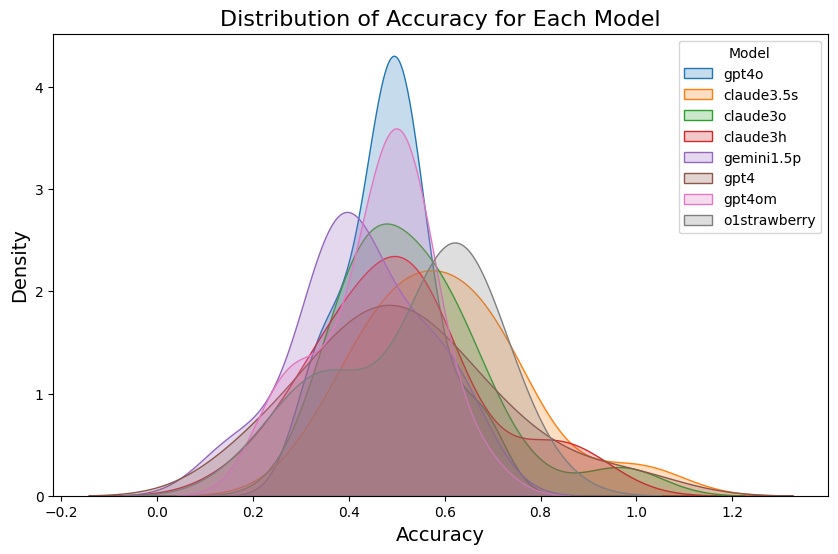

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(10, 6))

# List of models you want to plot
models = eval_table['Model'].unique()

# Loop through each model and plot the distribution of Accuracy
for model in models:
    sns.kdeplot(data=eval_table[eval_table['Model'] == model]['Accuracy'], 
                label=model, shade=True)

# Add title and labels
plt.title('Distribution of Accuracy for Each Model', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a legend to distinguish the models
plt.legend(title='Model')

# Show the plot
plt.show()

In [102]:
parsed_data = parse_grading_text_from_file('../iol_2014/claude3o/evaluation.txt')
json_output = json.dumps(parsed_data, indent=4)
json_output = json.loads(json_output)
json_output

{'Problem 1': {'Part a': {'1': {'Classification': 'Type 2',
    'LLM Answer': 'nonifibe - I am piercing you(sg)',
    'Real Answer': 'noniʔbe — you (pl.) are piercing me',
    'Grade': 0},
   '2': {'Classification': 'Type 2',
    'LLM Answer': "halu'ibe - we both will strike you(sg)",
    'Real Answer': "halu'ibe — we both will strike him",
    'Grade': 1},
   '3': {'Classification': 'Type 2',
    'LLM Answer': 'lifilatagihe - because you(pl) will pierce us',
    'Real Answer': 'liʔlatagihe — because you (sg.) will pierce us',
    'Grade': 1},
   '4': {'Classification': 'Type 2',
    'LLM Answer': 'nokufune - I am piercing you(pl)',
    'Real Answer': 'nokufune — we are piercing you (sg.)',
    'Grade': 1},
   '5': {'Classification': 'Type 2',
    'LLM Answer': 'nolahanagihe - because we will strike you(sg)',
    'Real Answer': 'nolahanagihe — because you (pl.) are striking us',
    'Grade': 0}},
  'Part b': {'1': {'Classification': 'Type 2',
    'LLM Answer': 'nohobe',
    'Real Answe